 IDEA: UNVELLING THE ANDROID APP MARKET: ANALYZING GOOGLE PLAY STORE DATA

PROJECT 4 PROPOSAL LEVEL 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import re

apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')

In [2]:
apps_df = apps_df.sort_values('Reviews', ascending=False).drop_duplicates('App').reset_index(drop=True)

In [3]:
def convert_size(size):
    if 'M' in str(size):
        size = float(size.replace('M', ''))
    elif 'k' in str(size):
        size = float(size.replace('k', '')) / 1024
    else:
        size = None
    return size

apps_df['Size'] = apps_df['Size'].apply(convert_size)

In [4]:
apps_df['Price'] = apps_df['Price'].apply(lambda x: float(x.replace('$', '')) if '$' in str(x) else 0)
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: int(x.replace(',', '').replace('+', '')))
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])
print("Basic Statistics of Apps Dataset:")
print(apps_df.describe())

Basic Statistics of Apps Dataset:
         Unnamed: 0       Rating       Reviews      Installs        Price  \
count   9659.000000  8196.000000  9.659000e+03  9.659000e+03  9659.000000   
mean    5666.172896     4.173243  2.165926e+05  7.777507e+06     1.099299   
min        0.000000     1.000000  0.000000e+00  0.000000e+00     0.000000   
25%     3111.500000     4.000000  2.500000e+01  1.000000e+03     0.000000   
50%     5814.000000     4.300000  9.670000e+02  1.000000e+05     0.000000   
75%     8327.500000     4.500000  2.940100e+04  1.000000e+06     0.000000   
max    10840.000000     5.000000  7.815831e+07  1.000000e+09   400.000000   
std     3102.362863     0.536625  1.831320e+06  5.375828e+07    16.852152   

                        Last Updated  
count                           9659  
mean   2017-10-30 19:34:02.074748928  
min              2010-05-21 00:00:00  
25%              2017-08-05 12:00:00  
50%              2018-05-04 00:00:00  
75%              2018-07-17 00:00:00  

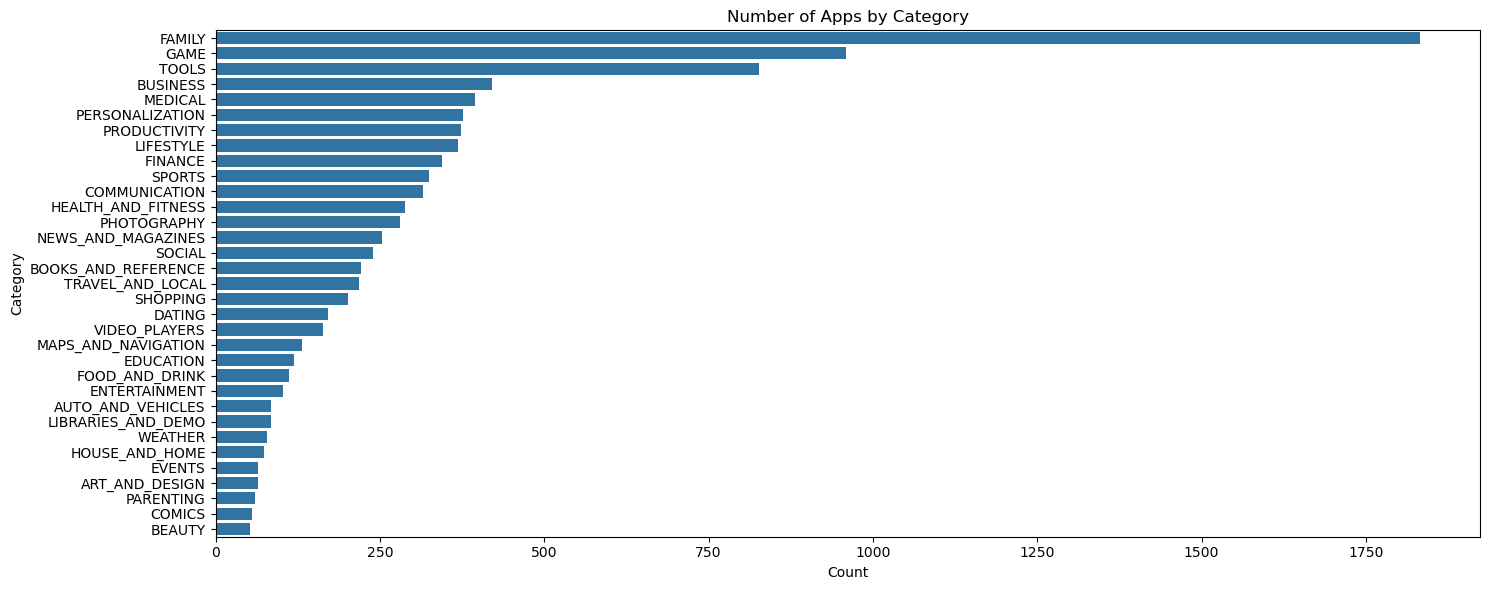

In [5]:
plt.figure(figsize=(15, 6))
category_counts = apps_df['Category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Number of Apps by Category')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

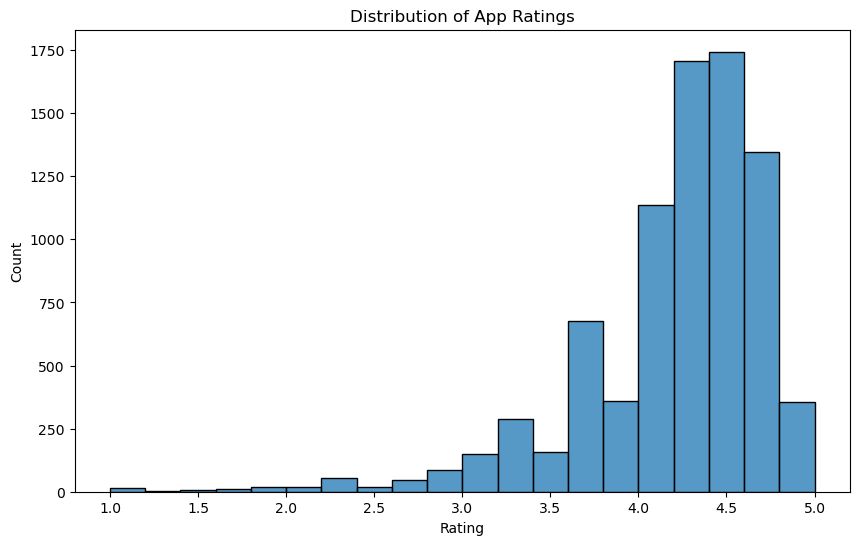

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=apps_df, x='Rating', bins=20)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

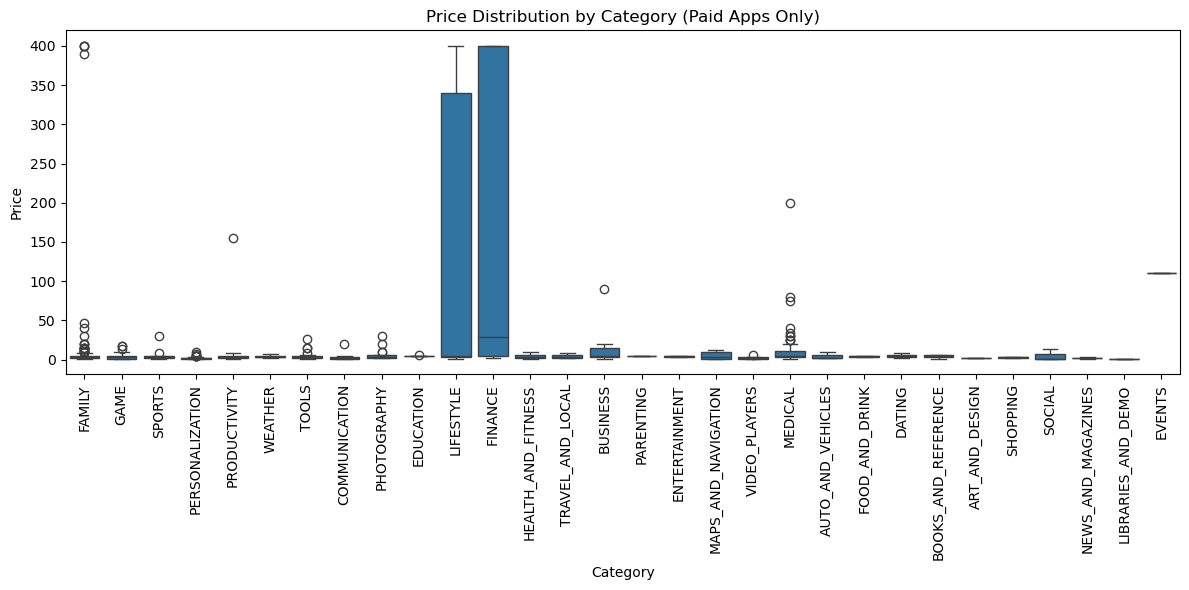

In [7]:
plt.figure(figsize=(12, 6))
paid_apps = apps_df[apps_df['Price'] > 0]
sns.boxplot(x='Category', y='Price', data=paid_apps)
plt.xticks(rotation=90)
plt.title('Price Distribution by Category (Paid Apps Only)')
plt.tight_layout()
plt.show()

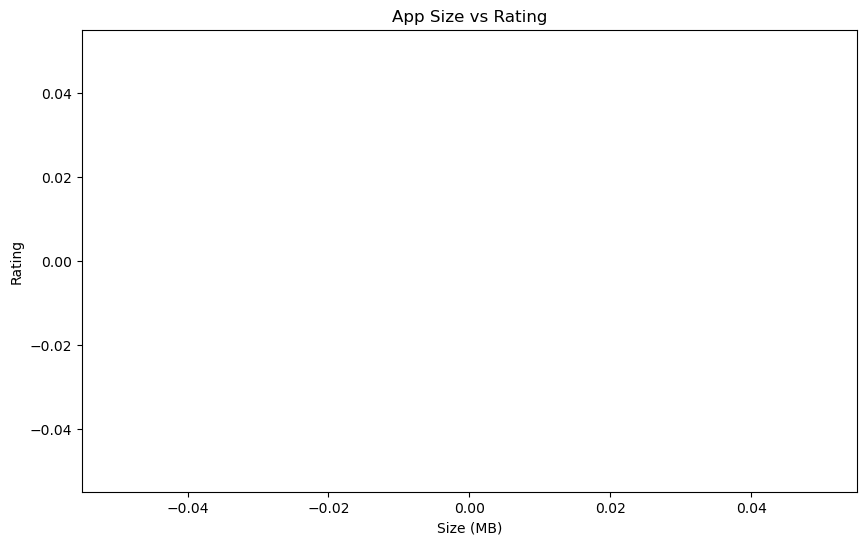

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=apps_df, x='Size', y='Rating', alpha=0.5)
plt.title('App Size vs Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

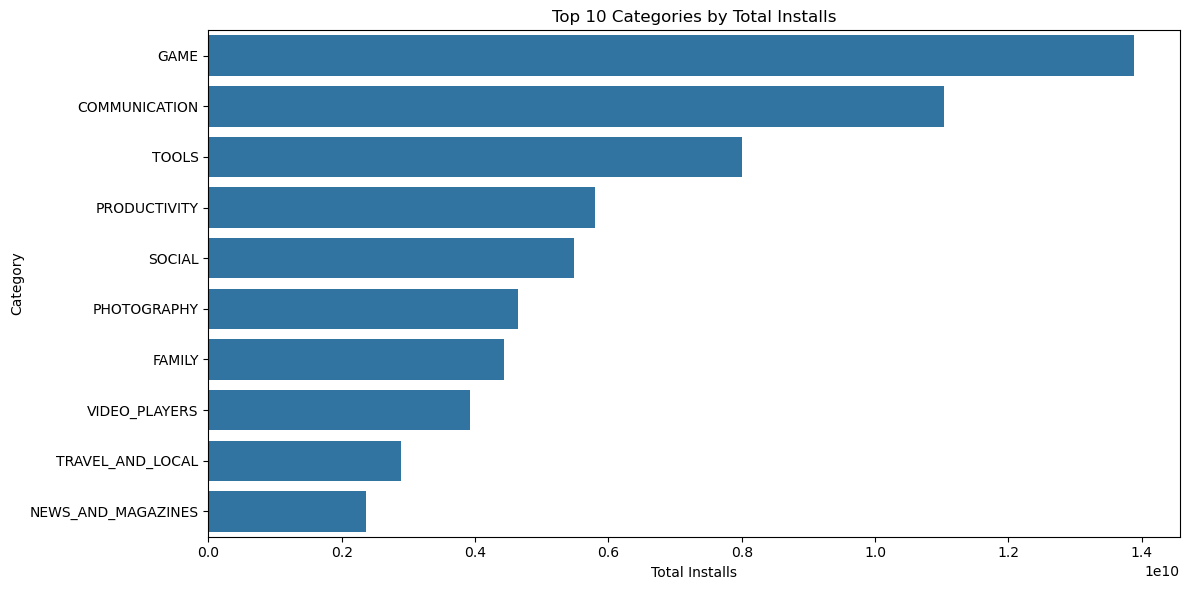

In [9]:
plt.figure(figsize=(12, 6))
top_categories = apps_df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Total Installs')
plt.tight_layout()
plt.show()

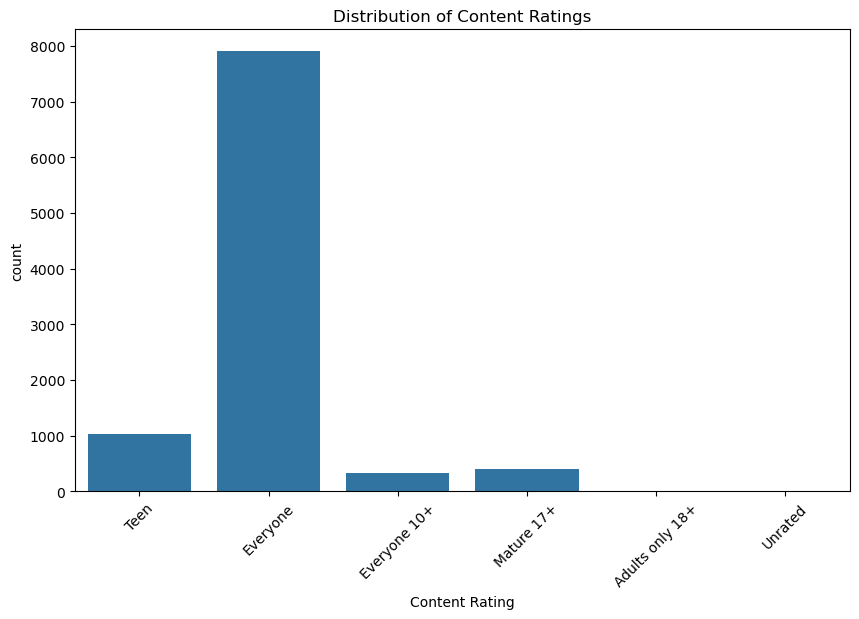

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=apps_df, x='Content Rating')
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.show()

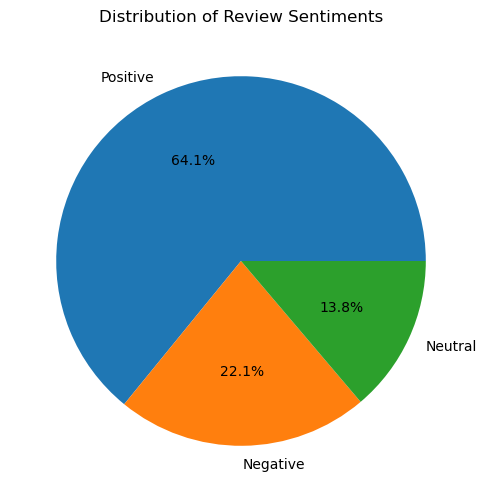

In [11]:
sentiment_counts = reviews_df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Review Sentiments')
plt.show()

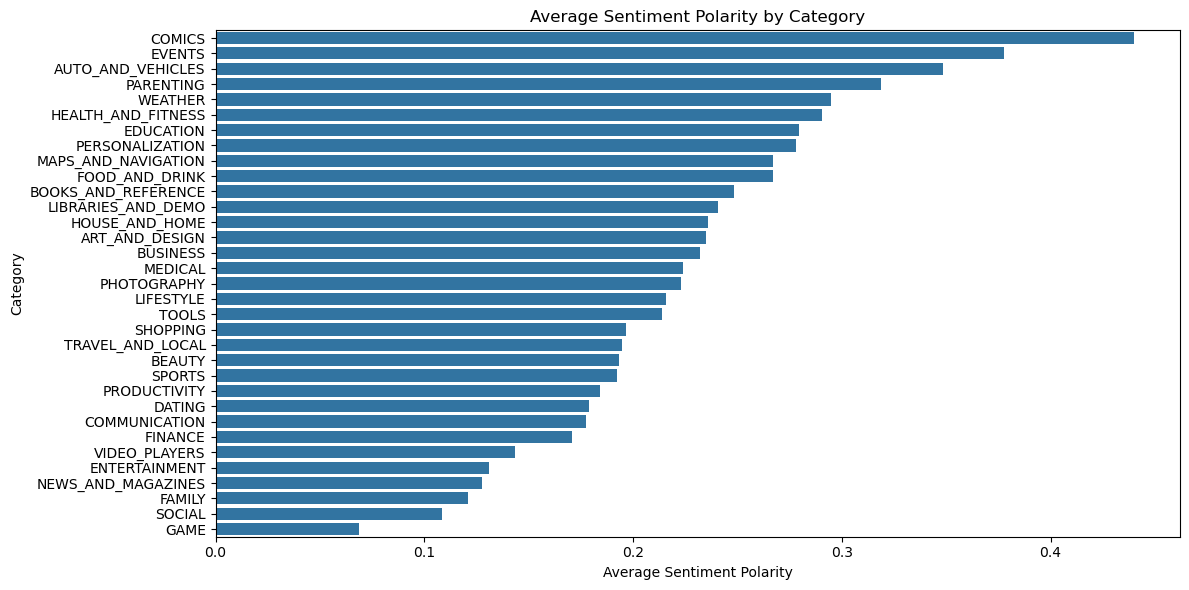

In [12]:
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')
avg_sentiment = merged_df.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sentiment.values, y=avg_sentiment.index)
plt.title('Average Sentiment Polarity by Category')
plt.xlabel('Average Sentiment Polarity')
plt.tight_layout()
plt.show()

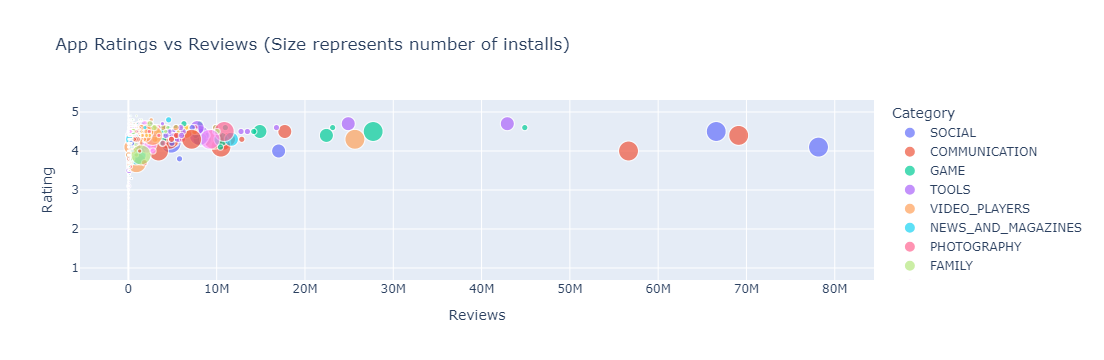

In [13]:
fig = px.scatter(apps_df, x='Reviews', y='Rating',size='Installs',color='Category',hover_data=['App', 'Price'],
                 title='App Ratings vs Reviews (Size represents number of installs)')
fig.show()

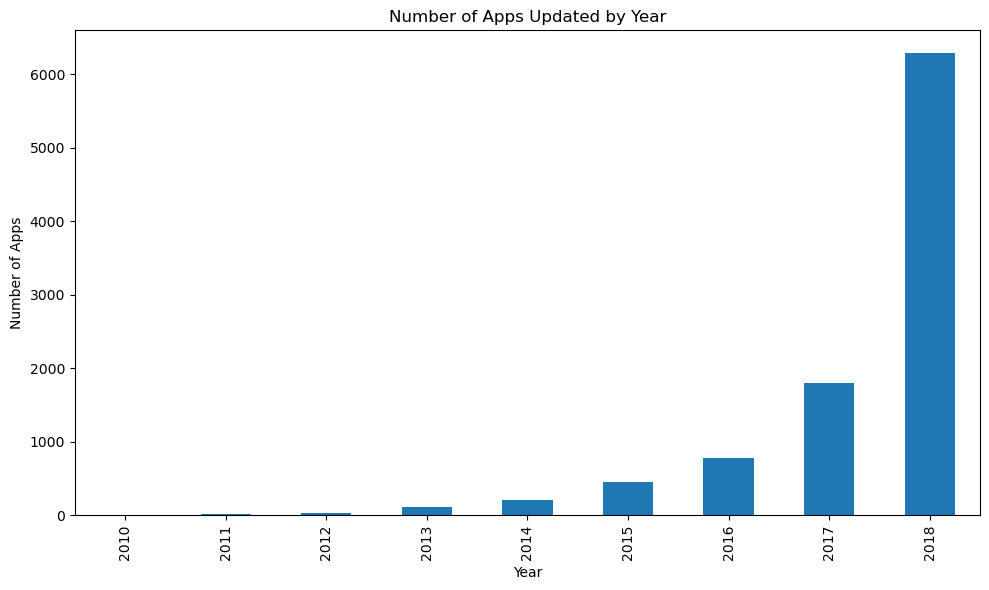

In [14]:
apps_df['Year'] = apps_df['Last Updated'].dt.year
yearly_apps = apps_df.groupby('Year').size()

plt.figure(figsize=(10, 6))
yearly_apps.plot(kind='bar')
plt.title('Number of Apps Updated by Year')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.tight_layout()
plt.show()

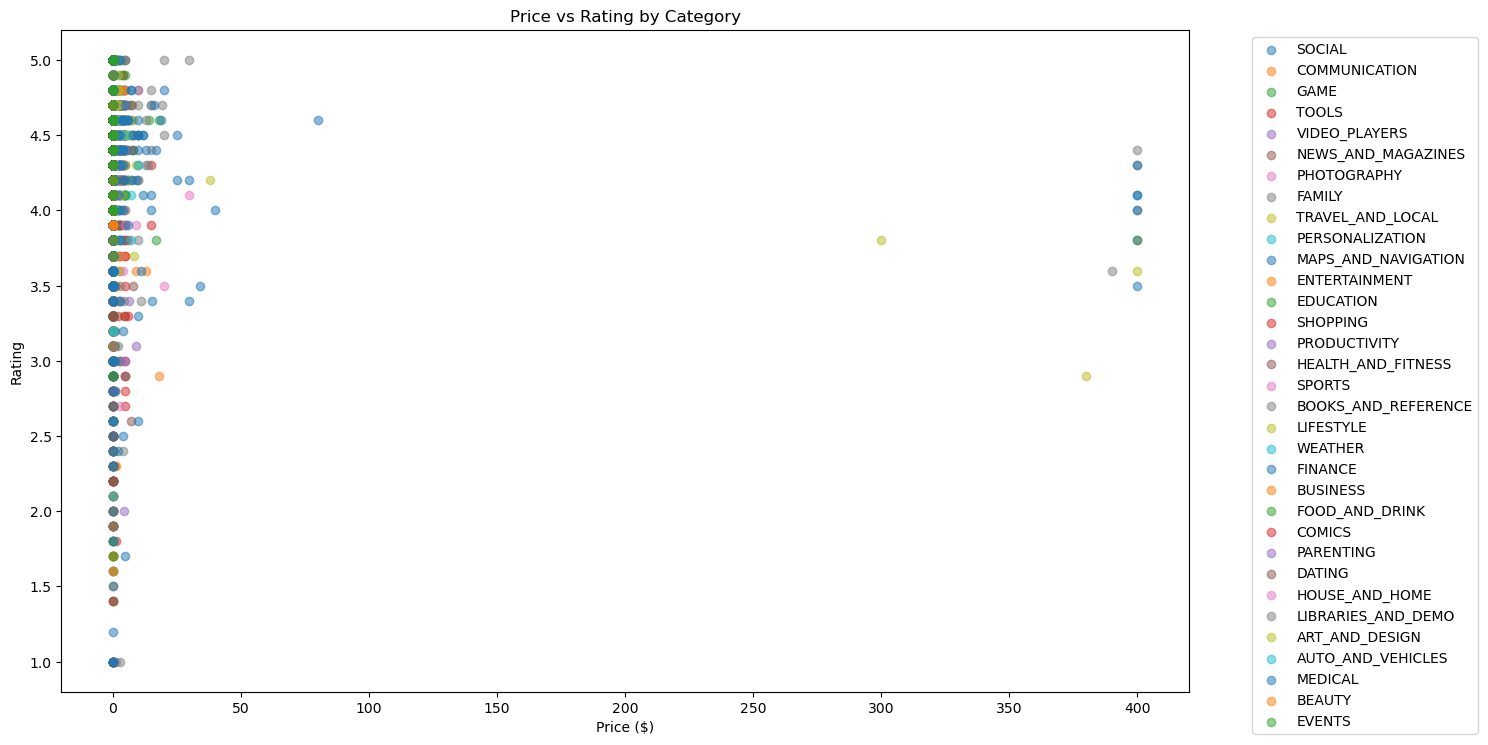

In [15]:
plt.figure(figsize=(15, 8))
for category in apps_df['Category'].unique():
    category_data = apps_df[apps_df['Category'] == category]
    plt.scatter(category_data['Price'], category_data['Rating'], alpha=0.5, label=category)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Price vs Rating by Category')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

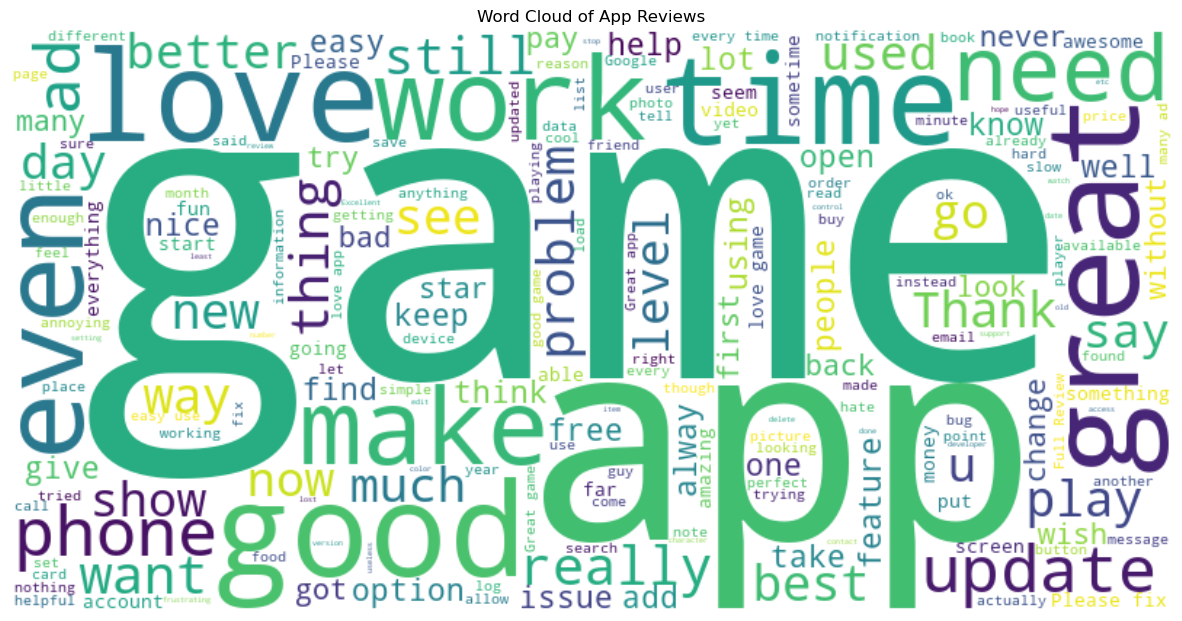

In [16]:
text = ' '.join(reviews_df['Translated_Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of App Reviews')
plt.show()

In [17]:
print("\nSummary Statistics:")
print(f"Total number of apps: {len(apps_df)}")
print(f"Number of categories: {len(apps_df['Category'].unique())}")
print(f"Average rating: {apps_df['Rating'].mean():.2f}")
print(f"Percentage of free apps: {(len(apps_df[apps_df['Price'] == 0]) / len(apps_df) * 100):.2f}%")
print(f"Average app size: {apps_df['Size'].mean():.2f} MB")


Summary Statistics:
Total number of apps: 9659
Number of categories: 33
Average rating: 4.17
Percentage of free apps: 92.17%
Average app size: nan MB


In [18]:
insights = pd.DataFrame({
    'Category': apps_df['Category'].unique(),
    'Number_of_Apps': apps_df.groupby('Category').size(),
    'Average_Rating': apps_df.groupby('Category')['Rating'].mean(),
    'Average_Price': apps_df.groupby('Category')['Price'].mean(),
    'Total_Installs': apps_df.groupby('Category')['Installs'].sum(),
    'Average_Sentiment': merged_df.groupby('Category')['Sentiment_Polarity'].mean()
})
insights.to_csv('playstore_insights.csv')

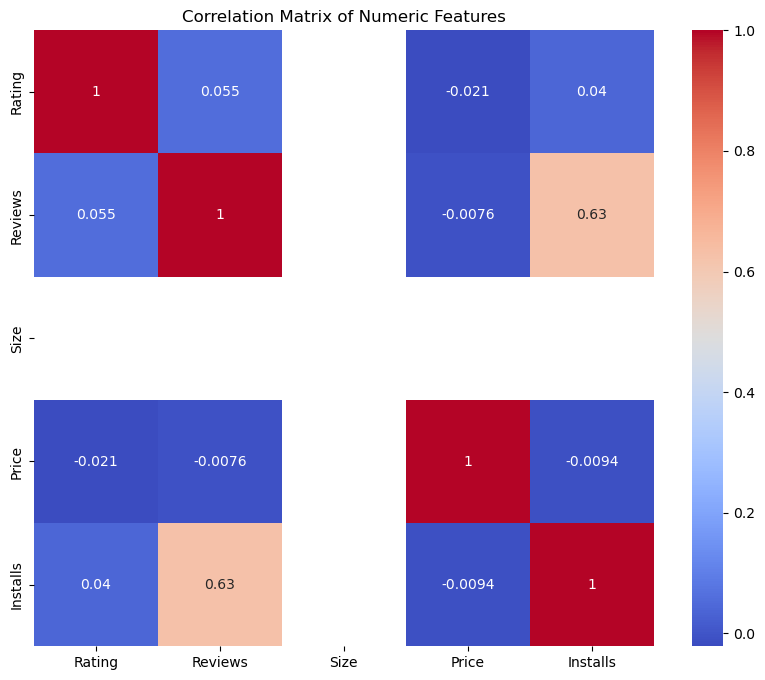

In [19]:
correlation_matrix = apps_df[['Rating', 'Reviews', 'Size', 'Price', 'Installs']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()